<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/Intrusion%20detection%20system%20KDD99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style=' border:1;'>Intrusion detection system<center></center></h1>

----
- By : ***Loai Nazeer***
- Email : lnaze101@uOttawa.ca
- Date : 15-11-2021
----

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('traindata.csv') 
df.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,tcp,http,SF,295,2584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,tcp,http,SF,312,839,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.0,0.0,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,tcp,ftp,SF,1225,2451,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,tcp,http,SF,293,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,tcp,X11,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.5,1.0,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23002 entries, 0 to 23001
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           23002 non-null  int64  
 1   duration                     23002 non-null  int64  
 2   protocol_type                23002 non-null  object 
 3   service                      23002 non-null  object 
 4   flag                         23002 non-null  object 
 5   src_bytes                    23002 non-null  int64  
 6   dst_bytes                    23002 non-null  int64  
 7   land                         23002 non-null  int64  
 8   wrong_fragment               23002 non-null  int64  
 9   urgent                       23002 non-null  int64  
 10  hot                          23002 non-null  int64  
 11  num_failed_logins            23002 non-null  int64  
 12  logged_in                    23002 non-null  int64  
 13  num_compromised 

In [ ]:
# check for NaN values 
df.isna().sum().sum()

0

In [ ]:
# check for values approaching infinity
df = df.replace([np.inf, -np.inf], np.nan)
df.isna().sum().sum()

0

- We can see from previous cells that our data does not have any nulls or infinity values.
- Also, we can see that we have 3 columns with object types we need to change them to categorical by making encoding.

In [ ]:
le = LabelEncoder()
protocol_type = le.fit_transform(df['protocol_type'])
service = le.fit_transform(df['service'])
flag = le.fit_transform(df['flag'])

df["protocol_type"].drop
df["service"].drop
df["flag"].drop
df["protocol_type"]=protocol_type
df["service"]=service
df["flag"]=flag
df

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,0,0,1,22,9,295,2584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.00,0.00,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,1,0,1,22,9,312,839,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.00,0.00,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,2,0,1,18,9,1225,2451,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,3,0,1,22,9,293,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.00,0.00,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,4,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.50,1.00,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22997,22997,0,1,22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.00,0.00,0.00,4,227,1.00,0.00,0.25,0.15,0.0,0.0,1.00,0.87,21,0
22998,22998,0,1,57,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,206,13,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,13,0.05,0.05,0.00,0.00,1.0,1.0,0.00,0.00,19,1
22999,22999,0,1,46,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,2,1.0,1.0,0.0,0.0,0.02,0.06,0.00,255,16,0.06,0.08,0.00,0.00,1.0,1.0,0.00,0.00,21,1
23000,23000,0,2,41,9,516,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,270,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,1.00,0.00,0.0,0.0,0.00,0.00,17,0


In [ ]:
df.describe()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
count,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,2.300200e+04,2.300200e+04,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.0,23002.0,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000,23002.000000
mean,11500.500000,307.196896,1.051648,29.195505,6.944005,2.588955e+04,3.588139e+03,0.000087,0.024259,0.000043,0.199113,0.001174,0.386532,0.231241,0.001522,0.001348,0.254021,0.015738,0.000348,0.004217,0.0,0.0,0.009130,86.293583,27.709677,0.293896,0.291314,0.120027,0.121652,0.652095,0.063529,0.095490,183.698200,112.993783,0.511856,0.084503,0.147974,0.031739,0.293264,0.287243,0.119363,0.120072,19.467220,0.478263
std,6640.249782,2697.345784,0.427351,15.634796,2.684713,2.522555e+06,9.231127e+04,0.009324,0.262794,0.006594,2.167079,0.046141,0.486965,10.778668,0.038979,0.049763,11.922472,0.553408,0.018646,0.100126,0.0,0.0,0.095114,115.411966,72.648352,0.450766,0.451190,0.320284,0.323992,0.441899,0.179799,0.256932,98.685887,110.359060,0.448993,0.189916,0.309429,0.111354,0.448771,0.449637,0.307603,0.319011,2.331899,0.499538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5750.250000,0.000000,1.000000,19.000000,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,87.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,11500.500000,0.000000,1.000000,22.000000,9.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,15.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,57.000000,0.460000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,17250.750000,0.000000,1.000000,46.000000,9.000000,2.747500e+02,4.860000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,146.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,23001.000000,42862.000000,2.000000,65.000000,10.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.000000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.00

- We can see that we have two columns ["num_outbound_cmds", "is_host_login"] that does not have any values all equal to zero, so we will drop them.

In [ ]:
X = df.drop(['Class',"num_outbound_cmds","is_host_login"],axis=1)
y = df['Class']

0    12001
1    11001
Name: Class, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


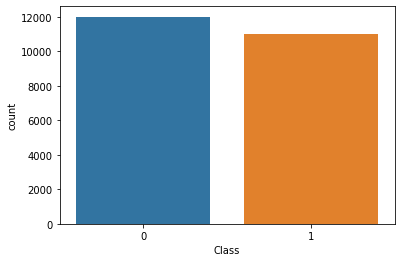

In [ ]:
print(y.value_counts(),"\n")
sns.countplot(y)

- We can see that the data was balanced, we do not need to make oversampling or undersampling.

**Features Importance**

In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
import_fet=pd.DataFrame({ "Varname": X.columns, "Imp": rf.feature_importances_}) 
import_fet.sort_values(by="Imp", ascending=False)

,Varname,Imp
5,src_bytes,0.188974
6,dst_bytes,0.127650
4,flag,0.081844
40,level,0.066199
31,dst_host_srv_count,0.065782
27,same_srv_rate,0.054893
32,dst_host_same_srv_rate,0.050960
28,diff_srv_rate,0.048161
21,count,0.045465
12,logged_in,0.027056


We tried to select many features from the previous step until we found that 8 features gives the best results.

In [ ]:
X = df.drop(['Class','srv_rerror_rate','hot','dst_host_srv_rerror_rate','rerror_rate','num_compromised',"wrong_fragment","srv_diff_host_rate","duration","ID",
          "is_guest_login","num_root","num_failed_logins","num_file_creations","root_shell","su_attempted","num_access_files","num_outbound_cmds","num_shells","urgent","land","is_host_login",
         "dst_bytes","dst_host_srv_diff_host_rate","dst_host_rerror_rate","logged_in","same_srv_rate","serror_rate","dst_host_srv_serror_rate","diff_srv_rate",
         "flag","srv_serror_rate","dst_host_diff_srv_rate","dst_host_srv_count","dst_host_same_srv_rate","service"],axis=1) 

In [ ]:
#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,stratify=y,random_state=1234)

- According to many papers in intrusion detection, most of them used : 
  - Tree-based algorithms like XGBoost, Random Forest or Decision Tree.
  -SVM
  -Deep Neural Network
- So we tried most of them before we found that XGboost and decision tree are the best.


In [ ]:
# Build the Model
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=2,max_depth=15,min_samples_leaf=88,
                            random_state=42,class_weight={0:0.04,1:0.8})
dt.fit(X,y) 
metrics.f1_score(y_test, dt.predict(X_test), average='macro')

0.9739160992420063

- Then we noticed that the model can be overfitted so easy, so we used an ensemble technique to avoid that.
- So we used Bagging technique.

In [ ]:
# Bagging technique

bag=BaggingClassifier(dt,bootstrap_features=True,random_state=42,n_jobs=-1,n_estimators=17)
bag.fit(X,y)
metrics.f1_score(y_test, bag.predict(X_test), average='macro')

0.9695729214680258

- We reached this hyperparameter by trial and error, at first we used grid research but gives us best hyperparameter based on this data, so we avoided this way and started to make tuning manually.

In [ ]:
#Load the test Dataset

df_t = pd.read_csv('testdata.csv')

protocol_type_t = le.fit_transform(df_t['protocol_type'])
service_t = le.fit_transform(df_t['service'])
flag_t = le.fit_transform(df_t['flag'])

df_t["protocol_type"].drop
df_t["service"].drop
df_t["flag"].drop
df_t["protocol_type"]=protocol_type_t
df_t["service"]=service_t
df_t["flag"]=flag_t

df_t=df_t.drop(['srv_rerror_rate','hot','dst_host_srv_rerror_rate','rerror_rate','num_compromised',"wrong_fragment","srv_diff_host_rate","duration","ID",
            "is_guest_login","num_root","num_failed_logins","num_file_creations","root_shell","su_attempted","num_access_files","num_outbound_cmds","num_shells","urgent","land","is_host_login",
            "dst_bytes","dst_host_srv_diff_host_rate","dst_host_rerror_rate","logged_in","same_srv_rate","serror_rate","dst_host_srv_serror_rate","diff_srv_rate",
            "flag","srv_serror_rate","dst_host_diff_srv_rate","dst_host_srv_count","dst_host_same_srv_rate","service"],axis=1)

df_t

,protocol_type,src_bytes,count,srv_count,dst_host_count,dst_host_same_src_port_rate,dst_host_serror_rate,level
0,1,30,1,1,255,0.00,0.0,16
1,1,0,240,5,255,0.00,1.0,21
2,2,52,511,511,255,1.00,0.0,17
3,1,367,1,1,8,0.12,0.0,21
4,0,1008,311,311,255,1.00,0.0,18
...,...,...,...,...,...,...,...,...
22496,1,298,21,21,168,0.01,0.0,21
22497,1,160,1,1,164,0.01,0.0,11
22498,1,0,148,18,255,0.00,1.0,21
22499,1,199,1,1,18,0.06,0.0,21


In [ ]:
y_pred = bag.predict(df_t)
y_pred=le.fit_transform(y_pred)
ids=range(0,len(y_pred))
df_test = pd.DataFrame({'id': ids,'Class': y_pred }) 
print(df_test)
df_test.to_csv("Results.csv",index=False,)

          id  Class
0          0      1
1          1      1
2          2      0
3          3      0
4          4      1
...      ...    ...
22496  22496      0
22497  22497      1
22498  22498      1
22499  22499      0
22500  22500      0

[22501 rows x 2 columns]
